<a href="https://colab.research.google.com/github/jhmuller/FourthBrain/blob/main/Week0_Regression_assignment_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Exercise shows how to use Google colab to apply regression models.**
**Copy the Colab notebook and data to your google drive before proceeding.**

Step 1: Connect Google drive that stores the data with your Google Colab Notebook

In [ ]:
!pip install plotnine

In [ ]:
!pip install -U -q PyDrive

In [1]:
import numpy as np
import numpy.matlib as matlib
import pandas as pd
import matplotlib as mpl
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Replace the ID with ID of file you want to access. To get this ID: 

1.   Right-click on the name of the appropriate file in your Google Drive
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary argument of the call to `drive.CreateFile()` as the value associated with the 'id' key. Make sure that this value is a string.



In [3]:
# Replace the ID with ID of file you want to access
# To get this ID, right-click on the name of the appropriate file in your 
downloaded = drive.CreateFile({'id':'1Z6MYK_-FV7J0aTVxoPnjI-E3DdbwMDHG'}) 
downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

Step 2: Read the Data and verify its format!

In [4]:
data = pd.read_csv('time_series_covid_19_confirmed.csv') 
print("The shape of data=",data.shape)
data.head()

The shape of data= (266, 225)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


Step 3: Original data has [266x225] dimensions. Let's use only 50 rows and 100 columns.

In [5]:
temp = data[list(data.columns)[1:]]
temp.set_index(list(temp.columns)[0:3], inplace=True)
temp.columns = range(len(temp.columns))
df = pd.DataFrame(temp.stack())
df.columns = ["val"]
df.reset_index(inplace=True)
df.rename(columns={"level_3":"day"}, inplace=True)
df["country_cat"] = df["Country/Region"].astype("category")
df.head()

,Country/Region,Lat,Long,day,val,country_cat
0,Afghanistan,33.93911,67.709953,0,0,Afghanistan
1,Afghanistan,33.93911,67.709953,1,0,Afghanistan
2,Afghanistan,33.93911,67.709953,2,0,Afghanistan
3,Afghanistan,33.93911,67.709953,3,0,Afghanistan
4,Afghanistan,33.93911,67.709953,4,0,Afghanistan


In [7]:
if False:
  from sklearn.preprocessing import LabelEncoder
  from sklearn.preprocessing import OneHotEncoder
  # creating instance of one-hot-encoder
  enc = OneHotEncoder(handle_unknown='ignore')

  # passing bridge-types-cat column (label encoded values of bridge_types)
  enc_df = pd.DataFrame(enc.fit_transform(df[['Country/Region']]).toarray())
  enc_df.columns = ["cntry_" + str(c) for c in list(enc_df.columns)]
  enc_df.head()
  edf = df.join(enc_df)
  edfhead()

In [43]:
xvars = ["Lat", "Long", "day"] 
yvar = "val"
X = df[xvars]
Y = df[yvar]

In [44]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
mse_list = []
for degree in range(1,18):
  poly = PolynomialFeatures(degree=degree)
  # Transform both the train and test data
  X_train = poly.fit_transform(X_train_1)
  X_test = poly.fit_transform(X_test_1)
  print("degree={0},  test data shape={1}".format(degree,np.shape(X_test)))
  clf = LinearRegression()
  # Fit the model on train data only
  clf.fit(X_train, y_train)
  #print("Linear Regression Coefficients are=",clf.coef_)
  #print("constant coefficient=",clf.intercept_)
  # Predict regression outcome on test data
  train_pred = clf.predict(X_train) 
  test_pred = clf.predict(X_test)
  from sklearn.metrics import mean_squared_error as mse
  test_mse = mse(y_test, test_pred)
  train_mse = mse(y_train, train_pred)
  mse_vals = {"test": test_mse, "train":train_mse}
  mse_list.append(mse_vals)

degree=1,  test data shape=(17636, 4)
degree=2,  test data shape=(17636, 10)
degree=3,  test data shape=(17636, 20)
degree=4,  test data shape=(17636, 35)
degree=5,  test data shape=(17636, 56)
degree=6,  test data shape=(17636, 84)
degree=7,  test data shape=(17636, 120)
degree=8,  test data shape=(17636, 165)
degree=9,  test data shape=(17636, 220)
degree=10,  test data shape=(17636, 286)
degree=11,  test data shape=(17636, 364)
degree=12,  test data shape=(17636, 455)
degree=13,  test data shape=(17636, 560)
degree=14,  test data shape=(17636, 680)
degree=15,  test data shape=(17636, 816)
degree=16,  test data shape=(17636, 969)
degree=17,  test data shape=(17636, 1140)


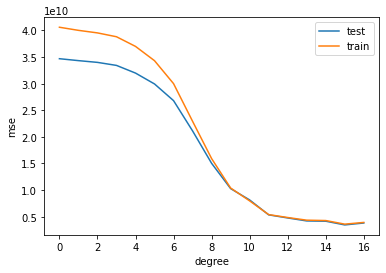

In [48]:
mse_df = pd.DataFrame(mse_list)
mse_df.plot(xlabel="degree", ylabel="mse")

Note that it Seems to make little sense to use Lat and Long as precictor variables

With that said, from the plot above of MSE vs. degree it seems that degree of somewhere between 10 and 12 is best.

It is odd that the test error is lower than the training error.



In [47]:
# I don't really understand what this step is doing
if False:
  # 1D polynomial regression
  model = np.poly1d(np.polyfit(np.transpose(X_train_1[:,2]), np.transpose(y_train[:,0]), 3))
  model_x = np.linspace(0, 100, 100)
  plt.figure(figsize=(20, 20), dpi=80)
  plt.scatter(X[:,2],Y[:])
  plt.plot(model_x, model(model_x),'r')
  plt.show()

In [16]:
#Assignment: Report the mean squared error for prediction using differnt degrers of Polynomial Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#1. Report the best model for this data

#2. Repeat for complete data (Change step 3) and report the best model

